In [8]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as pyplot
import pandas as pd
%matplotlib inline

In [2]:
sp_mat = sp.load_npz('chr16_82000001_85000001.npz')

In [3]:
sp_mat

<35503x35503 sparse matrix of type '<class 'numpy.float32'>'
	with 630249218 stored elements in COOrdinate format>

In [ ]:
sp_mat = sp.tril(sp_mat)

In [ ]:
sp_mat.diagonal(0)

In [ ]:
sp_mat.diagonal(-35500)

In [ ]:
m = sp_mat.tocsr()

In [ ]:
pyplot.spy(m[:100, :100], precision=0.01)

In [ ]:
testmat = m[:10000, :10000].todense()

In [ ]:
sym = np.maximum(testmat, testmat.transpose())

In [ ]:
sym = sym + 0

In [ ]:
pyplot.spy(sym, precision=0.1)

In [ ]:
pyplot.spy(sym, precision=0.01)

In [ ]:
testmat.max()

In [ ]:
pyplot.spy(sym, precision=0.25)

In [ ]:
testmat.min()

In [ ]:
sym.min()

In [ ]:
testmat.min()

In [ ]:
pyplot.hist(testmat)

In [ ]:
def spy_submat(sparse_mat, start_ind, end_ind, prec):
    dense_mat = sparse_mat[start_ind:end_ind, start_ind:end_ind].todense()
    dense_mat = np.maximum(dense_mat, dense_mat.transpose())
    pyplot.spy(dense_mat, precision=prec)
    pyplot.show()

In [ ]:
spy_submat(m, 0, 10000, .1)

In [ ]:
def spy_all(sparse_mat, interval, prec):
    intervals = [min(i * interval, m.shape[0]) for i in range((m.shape[0] // interval) + 2)]
    
    for i in range(len(intervals)-1):
        spy_submat(sparse_mat, intervals[i], intervals[i+1], prec)

In [ ]:
spy_all(m, 10000, .1)

In [ ]:
spy_all(m, 10000, .01)

In [ ]:
spy_all(m, 18000, .01)

In [ ]:
spy_all(m, 1000, .1)

In [ ]:
m.count_nonzero()

In [ ]:
spy_all(m, 500, .1)

In [2]:
sp_mat = sp.load_npz('chr16_82000001_85000001.npz')

In [3]:
m = sp.tril(sp_mat)
csr = m.tocsr()


In [4]:
nonzero = csr.nonzero()

In [5]:
nonzero_mask = np.array(np.abs(csr[nonzero])< .1)[0]

In [6]:
rows = nonzero[0][nonzero_mask]
cols = nonzero[1][nonzero_mask]

In [7]:
csr[rows,cols] = 0
csr.eliminate_zeros()

In [8]:
csr.data.nbytes

29697324

In [9]:
bsr = csr.tobsr()

In [11]:
bsr.data.nbytes

29697324

In [12]:
bsr.blocksize

(1, 1)

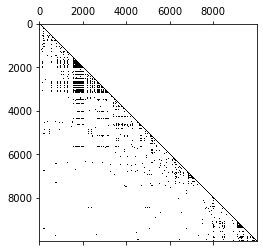

In [24]:
pyplot.spy(csr[:10000, :10000].todense())

In [26]:
subcsr = csr[:34000, :34000]

In [27]:
subbsr = subcsr.tobsr(blocksize=(2000,2000))

In [28]:
subbsr.data.nbytes

2448000000

In [29]:
subbsr

<34000x34000 sparse matrix of type '<class 'numpy.float32'>'
	with 612000000 stored elements (blocksize = 2000x2000) in Block Sparse Row format>

In [32]:
612000000/(2000*2000)

153.0

In [38]:
subbsr = subcsr.tobsr(blocksize=(1000,1000))

In [42]:
subcsr.tobsr(blocksize=(1,1))

<34000x34000 sparse matrix of type '<class 'numpy.float32'>'
	with 7185440 stored elements (blocksize = 1x1) in Block Sparse Row format>

In [43]:
subcsr.tobsr(blocksize=(10,10))

<34000x34000 sparse matrix of type '<class 'numpy.float32'>'
	with 82377900 stored elements (blocksize = 10x10) in Block Sparse Row format>

In [50]:
smallcsr = csr[:2000, :2000]

In [51]:
smallcsr

<2000x2000 sparse matrix of type '<class 'numpy.float32'>'
	with 238630 stored elements in Compressed Sparse Row format>

In [52]:
smallcsr.tobsr(blocksize=(100,100))

<2000x2000 sparse matrix of type '<class 'numpy.float32'>'
	with 2100000 stored elements (blocksize = 100x100) in Block Sparse Row format>

In [54]:
smallcsr.tocoo().data.nbytes

954520

In [55]:
smallcsr.data.nbytes

954520

In [57]:
smallcsr.tocsc().data.nbytes

954520

In [63]:
smallcsr.tolil()

<2000x2000 sparse matrix of type '<class 'numpy.float32'>'
	with 238630 stored elements in List of Lists format>

In [64]:
smallcsr

<2000x2000 sparse matrix of type '<class 'numpy.float32'>'
	with 238630 stored elements in Compressed Sparse Row format>

In [65]:
smallcsr.todense().data.nbytes / smallcsr.data.nbytes

16.76235175795164

In [69]:
smallcsr = m.tocsr()[:2000, :2000]

In [70]:
smallcsr

<2000x2000 sparse matrix of type '<class 'numpy.float32'>'
	with 2001000 stored elements in Compressed Sparse Row format>

In [71]:
smallcsr.todense().data.nbytes / smallcsr.data.nbytes

1.999000499750125

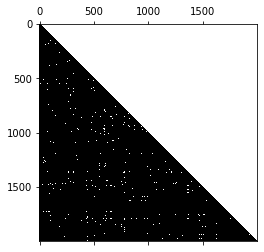

In [76]:
pyplot.spy(smallcsr.todense(), precision=.0001)

In [79]:
smallcsr.data.nbytes

8004000

In [80]:
smallcsr.tocoo().data.nbytes

8004000

In [81]:
sp.save_npz('csr', smallcsr, compressed=False)

In [86]:
sp.save_npz('csrc', smallcsr, compressed=True)

In [82]:
sp.save_npz('coo', smallcsr.tocoo(), compressed=False)

In [85]:
sp.save_npz('cooc', smallcsr.tocoo(), compressed=True)

In [88]:
smallcsr[100:, :100]

<1900x100 sparse matrix of type '<class 'numpy.float32'>'
	with 190000 stored elements in Compressed Sparse Row format>

In [7]:
sp_mat

TypeError: 'coo_matrix' object is not subscriptable

In [9]:
df = pd.read_csv('chr16_82000001_85000001', delimiter='\t')

<AxesSubplot:>

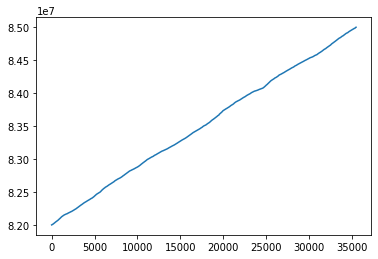

In [10]:
df.position.plot()